In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

import warnings
warnings.filterwarnings('ignore')

In [62]:
#read csv file.
train_t0 = pd.read_csv("train_t0.csv")
train_t1 = pd.read_csv("train_t1.csv")
test_t0 = pd.read_csv("test_t0.csv")


X = train_t0.drop(['ID'],axis=1).to_numpy()
y = train_t1.drop(['ID'],axis=1).to_numpy()
X_test1 = test_t0.drop(['ID'],axis=1).to_numpy()

# Review some of the statistics to check whether the data is skewed
print ("Mean of X Training set: ", np.mean(X), "\n")
print ("Median of X Training set: ", np.median(X), "\n")
print ("Mean of Y Training set: ", np.mean(y), "\n")
print ("Median of Y Training set: ", np.median(y), "\n")
print ("Std Dev of X Training set: ", np.std(X), "\n")
print ("Std Dev of Y Training set: ", np.std(y), "\n")


Mean of X Training set:  0.09226476813120446 

Median of X Training set:  0.07670489999999999 

Mean of Y Training set:  0.09620594456974789 

Median of Y Training set:  0.0786315 

Std Dev of X Training set:  0.07619520113655989 

Std Dev of Y Training set:  0.08582592198571934 



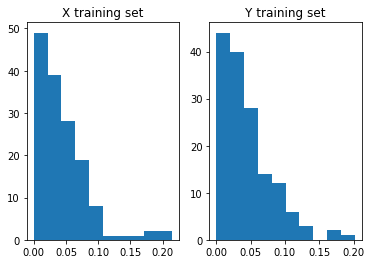

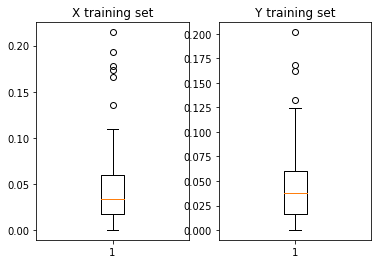

In [63]:
# Use subplot to have graphs side by side
plt.subplot(1, 2, 1)
plt.title('X training set')
plt.hist(train_t0["f1"])

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.hist(train_t1["f1"])
plt.show()

plt.subplot(1, 2, 1)
plt.title('X training set')
plt.boxplot(train_t0["f1"])

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.boxplot(train_t1["f1"])
plt.show()

In [64]:
train_t0.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595
count,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,0.044582,0.080598,0.071282,0.0,0.044582,0.080598,0.131620,0.115131,0.061869,...,0.105047,0.100972,0.172020,0.136881,0.127180,0.121855,0.109727,0.029184,0.029184,0.240352
std,43.445368,0.037994,0.039930,0.050766,0.0,0.037994,0.039930,0.037942,0.064775,0.046194,...,0.041862,0.059288,0.056443,0.047358,0.045876,0.042679,0.042027,0.026718,0.026718,0.078478
min,0.000000,0.000089,0.001989,0.000940,0.0,0.000089,0.001989,0.054214,0.000020,0.000580,...,0.012323,0.005157,0.007663,0.011979,0.030873,0.003749,0.014510,0.000395,0.000395,0.042528
25%,37.250000,0.017879,0.056915,0.032421,0.0,0.017879,0.056915,0.108719,0.068408,0.024877,...,0.076577,0.054555,0.135979,0.102224,0.093079,0.089561,0.080658,0.010046,0.010046,0.194399
50%,74.500000,0.033523,0.076158,0.061955,0.0,0.033523,0.076158,0.130866,0.115870,0.056490,...,0.101955,0.091981,0.158843,0.132284,0.123985,0.120384,0.107655,0.020933,0.020933,0.244233
75%,111.750000,0.059201,0.100670,0.099729,0.0,0.059201,0.100670,0.155715,0.155132,0.085909,...,0.131724,0.135250,0.201340,0.164686,0.155491,0.150561,0.131991,0.041979,0.041979,0.301425
max,149.000000,0.214443,0.375598,0.289502,0.0,0.214443,0.375598,0.273247,0.466629,0.242402,...,0.218610,0.299961,0.414848,0.345963,0.346058,0.242103,0.262390,0.186477,0.186477,0.465477


 ### NORMILIZER

In [65]:
normalizer = MaxAbsScaler().fit(X)
X=normalizer.transform(X)
X_test1=normalizer.transform(X_test1)
#test split for cross validation while trying
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)

### FEATURE SELECTION

In [66]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.0001 * (1 - .0001)))
X_train=sel.fit_transform(X_train)
y_train=sel.fit_transform(y_train)
X_test=sel.fit_transform(X_test)
y_test=sel.fit_transform(y_test)


print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(120, 589) (120, 589) (30, 589) (30, 589)


### OUTLIERS REMOVEL

(120, 589) (120, 589)


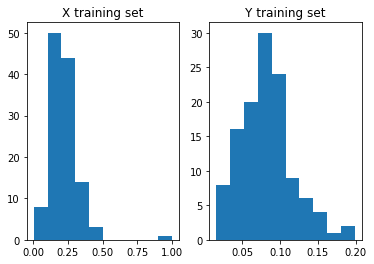

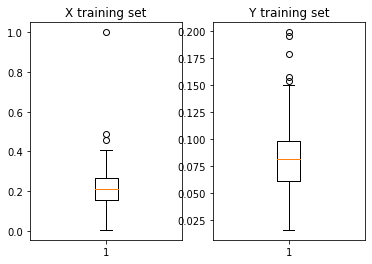

(84, 589) (84, 589)


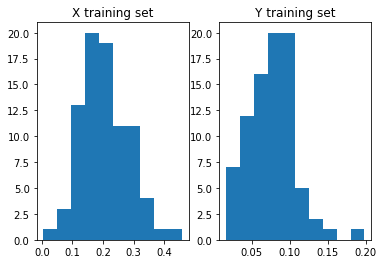

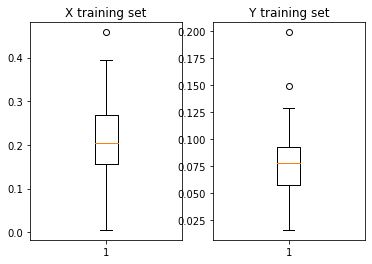

In [67]:

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

# Use subplot to have graphs side by side
plt.subplot(1, 2, 1)
plt.title('X training set')
plt.hist(X_train[:,1])

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.hist(y_train[:,1])
plt.show()

plt.subplot(1, 2, 1)
plt.title('X training set')
plt.boxplot(X_train[:,1])

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.boxplot(y_train[:,1])
plt.show()

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.3)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

# Use subplot to have graphs side by side
plt.subplot(1, 2, 1)
plt.title('X training set')
plt.hist(X_train[:,1])

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.hist(y_train[:,1])
plt.show()

plt.subplot(1, 2, 1)
plt.title('X training set')
plt.boxplot(X_train[:,1])

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.boxplot(y_train[:,1])
plt.show()

In [68]:
def linear_csv(predicted_values):
    melted_pred = predicted_values.flatten()
    df_pred = pd.DataFrame(data=melted_pred ,columns=['predicted'])
    df_pred.to_csv('linear_reg.csv', index=True,index_label='ID')

In [69]:
def ridge_csv(predicted_values):
    melted_pred = predicted_values.flatten()
    df_pred = pd.DataFrame(data=melted_pred ,columns=['predicted'])
    df_pred.to_csv('ridge_reg.csv', index=True,index_label='ID')

In [70]:
def calculate_mse(y_test, y_predict): #calculate MSE error.
    mse =  metrics.mean_squared_error(y_test, y_predict)
    return mse

 ## RIDGE REGRESSION

In [71]:
ridge_regressor = None
def rid(X_train, y_train, X_test):
    cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
    clf = Ridge()
    global ridge_regressor
    parameters= {'alpha': np.arange(0,20,1)} #possible alpha values
    ridge_regressor = GridSearchCV(clf, parameters, scoring='neg_mean_squared_error', cv= cv)
    ridge_regressor.fit(X_train, y_train)
    predicted_values = ridge_regressor.predict(X_test)
    return predicted_values

In [72]:
predicted_values = rid(X_train, y_train , X_test)
size = 30*X_train.shape[1]
r_y_test = y_test.reshape(size, 1)
r_predicted_values= predicted_values.reshape(size,1)
mse = calculate_mse(r_y_test, r_predicted_values)
print("MSE:", mse)

MSE: 0.004715939593112146


In [73]:
ridge_regressor.fit(X, y)
predicted_values_ridge = ridge_regressor.predict(X_test1)
ridge_csv(predicted_values_ridge)

 ## LINEAR REGRESSION

In [74]:
regressor = LinearRegression() 
def linear(X_train,y_train,X_test):
    global regressor
    predict = np.array([])
    mse_list = []
    weight_list = []
    for i in range(X_train.shape[1]):
        regressor.fit(X_train[:,i].reshape(X_train.shape[0],1), y_train[:,i].reshape(y_train.shape[0],1)) 
        predicted_values=regressor.predict(X_test[:,i].reshape(X_test.shape[0],1))
        if(i==0):
            predict=predicted_values.T
        else:
            predict = np.vstack((predict,predicted_values.T))
        weight_list.append(1/np.std(predicted_values.T))
        size = X_test.shape[0]
        r_y_test = y_test[:,i].reshape(size, 1)
        r_predicted_values= predicted_values.reshape(size,1)
        mse_list.append(calculate_mse(r_y_test, r_predicted_values))
        
    
    return predict.T,np.average(mse_list,weights=weight_list)

In [75]:
pred,mse=linear(X_train,y_train,X_test)
print("MSE:", mse)

MSE: 0.0036117674259373155


In [76]:
predict = np.array([])
for i in range(X.shape[1]):
    regressor.fit(X[:,i].reshape(y.shape[0],1), y[:,i].reshape(y.shape[0],1)) 
    predicted_values=regressor.predict(X_test1[:,i].reshape(X_test1.shape[0],1))
    #print(predict.shape,predicted_values[0])
    if(i==0):
        predict=predicted_values.T
    else:
        predict = np.vstack((predict,predicted_values.T))
    linear_csv(predict.T)

# K-fold 

In [77]:
np.random.seed(1)
kfold = KFold(n_splits=5, random_state=random.randint(0, len(X)), shuffle=True)
i =1
for train_i, test_i in kfold.split(X):
    X_train, X_test = X[train_i], X[test_i]
    y_train, y_test = y[train_i], y[test_i]
    model = rid(X_train, y_train, X_test)
    mse = metrics.mean_squared_error(model, y_test)
    mae = metrics.mean_absolute_error(model, y_test)
    print("Ridge",i,"- fold", "MSE:", mse, "MAE:", mae)
    
    model2,_ = linear(X_train, y_train, X_test)
    mse2 = metrics.mean_squared_error(model2, y_test)
    mae2 = metrics.mean_absolute_error(model2, y_test)
    print("Linear",i,"- fold", "MSE:", mse2, "MAE:", mae2)
    i +=1
    
    print()


Ridge 1 - fold MSE: 0.003554290421671745 MAE: 0.039594276476735975
Linear 1 - fold MSE: 0.0030879469800597303 MAE: 0.03620434745967551

Ridge 2 - fold MSE: 0.002504347128253212 MAE: 0.03625492635191287
Linear 2 - fold MSE: 0.001992408287071455 MAE: 0.03242868176250251

Ridge 3 - fold MSE: 0.008295923269805834 MAE: 0.046510742128643014
Linear 3 - fold MSE: 0.008202097894144842 MAE: 0.044290621309221845

Ridge 4 - fold MSE: 0.004398420185791552 MAE: 0.03999178563146548
Linear 4 - fold MSE: 0.004439499480887455 MAE: 0.03854736963271279

Ridge 5 - fold MSE: 0.002692482695011732 MAE: 0.03717957973437618
Linear 5 - fold MSE: 0.0022183701882516997 MAE: 0.033744420361320165



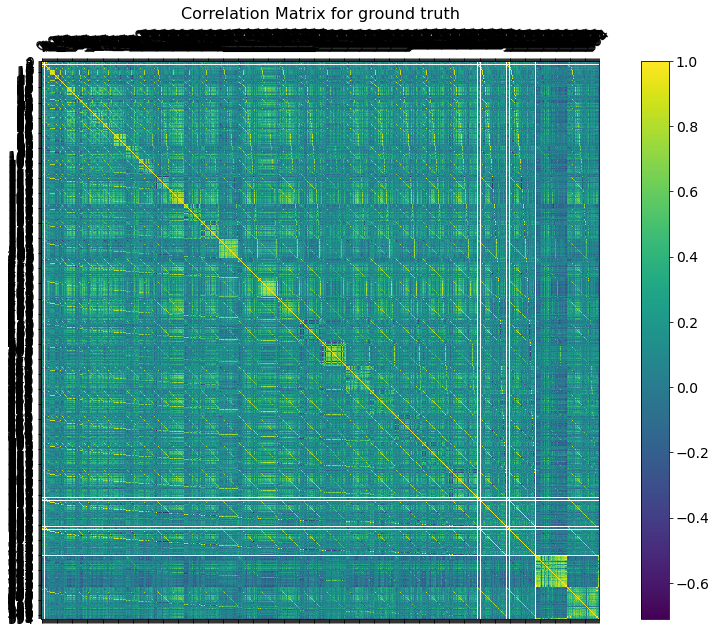

In [78]:
df= pd.DataFrame(X)
f = plt.figure(figsize=(15, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix for ground truth', fontsize=16);
plt.show()

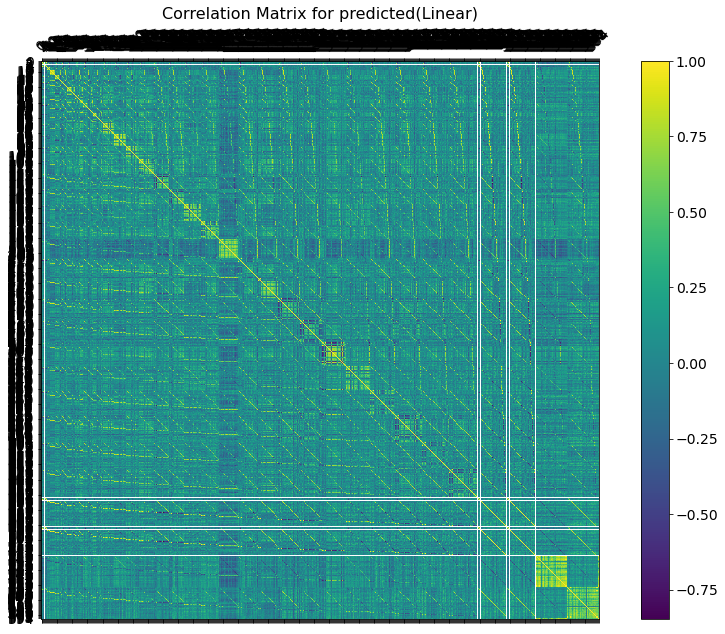

In [79]:
df1= pd.DataFrame(predict.T)
f1 = plt.figure(figsize=(15, 10))
plt.matshow(df1.corr(), fignum=f1.number)
plt.xticks(range(df.shape[1]), df1.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df1.columns, fontsize=14)
cb1 = plt.colorbar()
cb1.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix for predicted(Linear)', fontsize=16);
plt.show()

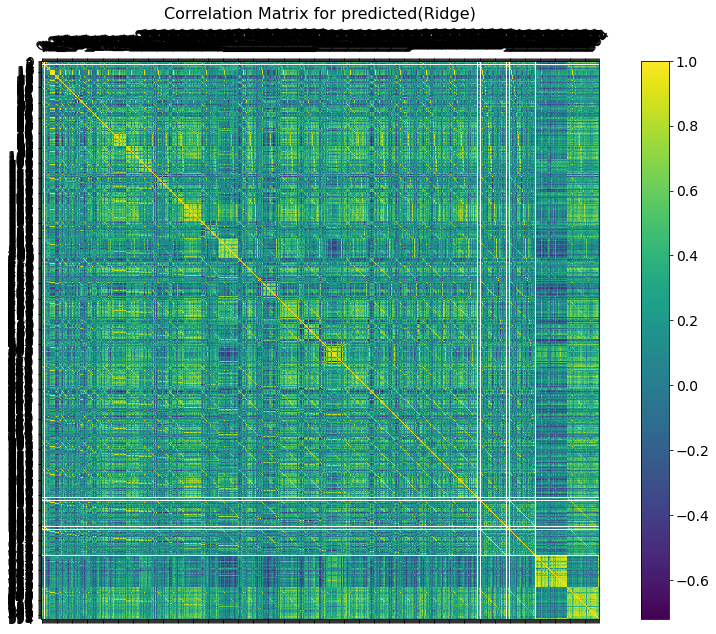

In [80]:
df1= pd.DataFrame(predicted_values_ridge)
f1 = plt.figure(figsize=(15, 10))
plt.matshow(df1.corr(), fignum=f1.number)
plt.xticks(range(df.shape[1]), df1.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df1.columns, fontsize=14)
cb1 = plt.colorbar()
cb1.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix for predicted(Ridge)', fontsize=16);
plt.show()